# 3-3,È´òÈò∂APIÁ§∫ËåÉ

PytorchÊ≤°ÊúâÂÆòÊñπÁöÑÈ´òÈò∂APIÔºå‰∏ÄËà¨ÈúÄË¶ÅÁî®Êà∑Ëá™Â∑±ÂÆûÁé∞ËÆ≠ÁªÉÂæ™ÁéØ„ÄÅÈ™åËØÅÂæ™ÁéØ„ÄÅÂíåÈ¢ÑÊµãÂæ™ÁéØ„ÄÇ

‰ΩúËÄÖÈÄöËøá‰ªøÁÖßkerasÁöÑÂäüËÉΩÂØπPytorchÁöÑnn.ModuleËøõË°å‰∫ÜÂ∞ÅË£ÖÔºåËÆæËÆ°‰∫Ütorchkeras.KerasModelÁ±ªÔºå

ÂÆûÁé∞‰∫Ü fit, evaluateÁ≠âÊñπÊ≥ïÔºåÁõ∏ÂΩì‰∫éÁî®Êà∑Ëá™ÂÆö‰πâÈ´òÈò∂API„ÄÇ

Âπ∂Á§∫ËåÉ‰∫ÜÁî®ÂÆÉÂÆûÁé∞Á∫øÊÄßÂõûÂΩíÊ®°ÂûãÂíåDNN‰∫åÂàÜÁ±ªÊ®°Âûã„ÄÇ

torchkeras.KerasModelÁ±ªÁúãËµ∑Êù•ÈùûÂ∏∏Âº∫Â§ßÔºå‰ΩÜÂÆûÈôÖ‰∏äÂÆÉ‰ª¨ÁöÑÊ∫êÁ†ÅÈùûÂ∏∏ÁÆÄÂçïÔºå‰∏çË∂≥200Ë°å„ÄÇ
Êàë‰ª¨Âú®Á¨¨‰∏ÄÁ´†‰∏≠`‰∏Ä„ÄÅPytorchÁöÑÂª∫Ê®°ÊµÅÁ®ã`Áî®Âà∞ÁöÑËÆ≠ÁªÉ‰ª£Á†ÅÂÖ∂ÂÆûÂ∞±ÊòØtorchkerasÂ∫ìÁöÑÊ†∏ÂøÉÊ∫êÁ†Å„ÄÇ



In [1]:
import torch 
import torchkeras 


print("torch.__version__="+torch.__version__) 
print("torchkeras.__version__="+torchkeras.__version__) 

torch.__version__=2.4.0
torchkeras.__version__=4.0.0


### ‰∏ÄÔºåÁ∫øÊÄßÂõûÂΩíÊ®°Âûã

Ê≠§ËåÉ‰æãÊàë‰ª¨ÈÄöËøá‰ΩøÁî®torchkeras.KerasModelÊ®°ÂûãÊé•Âè£ÔºåÂÆûÁé∞Á∫øÊÄßÂõûÂΩíÊ®°Âûã„ÄÇ

**1ÔºåÂáÜÂ§áÊï∞ÊçÆ**

In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader,TensorDataset

#Ê†∑Êú¨Êï∞Èáè
n = 400

# ÁîüÊàêÊµãËØïÁî®Êï∞ÊçÆÈõÜ
X = 10*torch.rand([n,2])-5.0  #torch.randÊòØÂùáÂåÄÂàÜÂ∏É 
w0 = torch.tensor([[2.0],[-3.0]])
b0 = torch.tensor([[10.0]])
Y = X@w0 + b0 + torch.normal( 0.0,2.0,size = [n,1])  # @Ë°®Á§∫Áü©Èòµ‰πòÊ≥ï,Â¢ûÂä†Ê≠£ÊÄÅÊâ∞Âä®


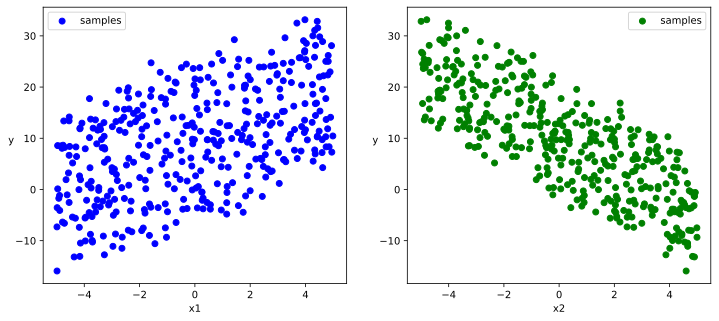

In [3]:
# Êï∞ÊçÆÂèØËßÜÂåñ

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.figure(figsize = (12,5))
ax1 = plt.subplot(121)
ax1.scatter(X[:,0],Y[:,0], c = "b",label = "samples")
ax1.legend()
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

ax2 = plt.subplot(122)
ax2.scatter(X[:,1],Y[:,0], c = "g",label = "samples")
ax2.legend()
plt.xlabel("x2")
plt.ylabel("y",rotation = 0)
plt.show()


In [4]:
#ÊûÑÂª∫ËæìÂÖ•Êï∞ÊçÆÁÆ°ÈÅì
ds = TensorDataset(X,Y)
ds_train,ds_val = torch.utils.data.random_split(ds,[int(400*0.7),400-int(400*0.7)])
dl_train = DataLoader(ds_train,batch_size = 16,shuffle=True,num_workers=2)
dl_val = DataLoader(ds_val,batch_size = 16,num_workers=2)

features,labels = next(iter(dl_train))


**2ÔºåÂÆö‰πâÊ®°Âûã**

In [5]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.fc = nn.Linear(2,1)
    
    def forward(self,x):
        return self.fc(x)

net = LinearRegression()


In [6]:
from torchkeras import summary 

summary(net,input_data=features);

--------------------------------------------------------------------------
Layer (type)                            Output Shape              Param #
Linear-1                                     [-1, 1]                    3
Total params: 3
Trainable params: 3
Non-trainable params: 0
--------------------------------------------------------------------------
Input size (MB): 0.000076
Forward/backward pass size (MB): 0.000008
Params size (MB): 0.000011
Estimated Total Size (MB): 0.000095
--------------------------------------------------------------------------


**3ÔºåËÆ≠ÁªÉÊ®°Âûã**

<<<<<< üöÄ mps is used >>>>>>


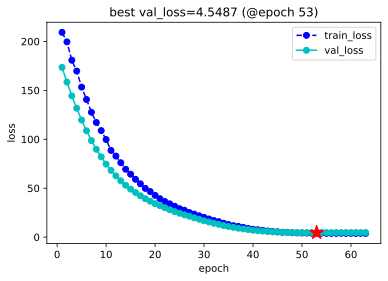

<<<<<< val_loss without improvement in 10 epoch,early stopping >>>>>> 



In [7]:
from torchkeras import KerasModel 

import torchmetrics

net = LinearRegression()
keras_model = KerasModel(net=net,
                   loss_fn = nn.MSELoss(),
                   metrics_dict = {"mae":torchmetrics.MeanAbsoluteError()},
                   optimizer= torch.optim.Adam(net.parameters(),lr = 0.01))

dfhistory = keras_model.fit(train_data=dl_train,
      val_data=dl_val,
      epochs=100,
      ckpt_path='checkpoint',
      patience=10,
      monitor='val_loss',
      mode='min')


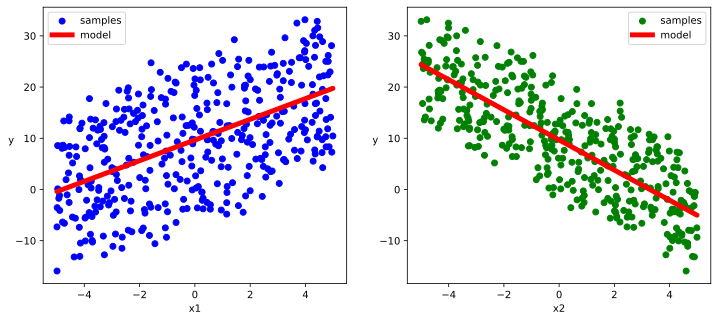

In [8]:
# ÁªìÊûúÂèØËßÜÂåñ

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

w,b = net.state_dict()["fc.weight"],net.state_dict()["fc.bias"]

plt.figure(figsize = (12,5))
ax1 = plt.subplot(121)
ax1.scatter(X[:,0],Y[:,0], c = "b",label = "samples")
ax1.plot(X[:,0],w[0,0]*X[:,0]+b[0],"-r",linewidth = 5.0,label = "model")
ax1.legend()
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)


ax2 = plt.subplot(122)
ax2.scatter(X[:,1],Y[:,0], c = "g",label = "samples")
ax2.plot(X[:,1],w[0,1]*X[:,1]+b[0],"-r",linewidth = 5.0,label = "model")
ax2.legend()
plt.xlabel("x2")
plt.ylabel("y",rotation = 0)

plt.show()


**4ÔºåËØÑ‰º∞Ê®°Âûã**

In [9]:
dfhistory.tail()

epoch  train_loss  train_mae    lr  val_loss   val_mae
58     59    3.841220   1.538144  0.01  4.674088  1.710177
59     60    3.826451   1.550382  0.01  4.675259  1.712138
60     61    3.753347   1.547791  0.01  4.679285  1.710570
61     62    3.816411   1.543212  0.01  4.664924  1.715664
62     63    3.788748   1.540675  0.01  4.670105  1.719656

In [11]:
# ËØÑ‰º∞
keras_model.evaluate(dl_val)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8/8 [00:01<00:00,  7.35it/s, val_loss=4.55, val_mae=1.69]


{'val_loss': 4.548661649227142, 'val_mae': 1.6933581829071045}

**5Ôºå‰ΩøÁî®Ê®°Âûã**

In [12]:
# È¢ÑÊµã
dl = DataLoader(TensorDataset(X))

result = []
with torch.no_grad():
    for batch in dl:
        features = batch[0].to(model.accelerator.device)
        res = net(features)
        result.extend(res.tolist())
result = np.array(result).flatten() 
print(result[:10])

[ -2.59177876   9.71567726 -13.93105412   8.77032089   7.6212492
  19.76228714  12.34058475  -2.8944931   -2.67854691   8.81674194]


### ‰∫åÔºåDNN‰∫åÂàÜÁ±ªÊ®°Âûã

**1ÔºåÂáÜÂ§áÊï∞ÊçÆ**

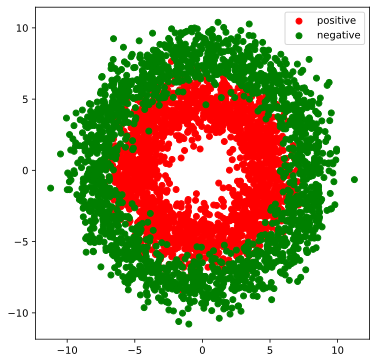

In [14]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader,TensorDataset
import torchkeras 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#Ê≠£Ë¥üÊ†∑Êú¨Êï∞Èáè
n_positive,n_negative = 2000,2000

#ÁîüÊàêÊ≠£Ê†∑Êú¨, Â∞èÂúÜÁéØÂàÜÂ∏É
r_p = 5.0 + torch.normal(0.0,1.0,size = [n_positive,1]) 
theta_p = 2*np.pi*torch.rand([n_positive,1])
Xp = torch.cat([r_p*torch.cos(theta_p),r_p*torch.sin(theta_p)],axis = 1)
Yp = torch.ones_like(r_p)

#ÁîüÊàêË¥üÊ†∑Êú¨, Â§ßÂúÜÁéØÂàÜÂ∏É
r_n = 8.0 + torch.normal(0.0,1.0,size = [n_negative,1]) 
theta_n = 2*np.pi*torch.rand([n_negative,1])
Xn = torch.cat([r_n*torch.cos(theta_n),r_n*torch.sin(theta_n)],axis = 1)
Yn = torch.zeros_like(r_n)

#Ê±áÊÄªÊ†∑Êú¨
X = torch.cat([Xp,Xn],axis = 0)
Y = torch.cat([Yp,Yn],axis = 0)


#ÂèØËßÜÂåñ
plt.figure(figsize = (6,6))
plt.scatter(Xp[:,0],Xp[:,1],c = "r")
plt.scatter(Xn[:,0],Xn[:,1],c = "g")
plt.legend(["positive","negative"]);


In [15]:
ds = TensorDataset(X,Y)

ds_train,ds_val = torch.utils.data.random_split(ds,[int(len(ds)*0.7),len(ds)-int(len(ds)*0.7)])
dl_train = DataLoader(ds_train,batch_size = 100,shuffle=True,num_workers=2)
dl_val = DataLoader(ds_val,batch_size = 100,num_workers=2)

for features,labels in dl_train:
    break 

**2ÔºåÂÆö‰πâÊ®°Âûã**

In [16]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2,4)
        self.fc2 = nn.Linear(4,8) 
        self.fc3 = nn.Linear(8,1)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        y = self.fc3(x)
        return y
    

In [18]:
from torchkeras import KerasModel 
from torchkeras.metrics import Accuracy

net = Net()
loss_fn = nn.BCEWithLogitsLoss()
metric_dict = {"acc":Accuracy()}

optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

keras_model = KerasModel(net,
                   loss_fn = loss_fn,
                   metrics_dict= metric_dict,
                   optimizer = optimizer
                  )       

from torchkeras import summary
summary(net,input_data=features);


--------------------------------------------------------------------------
Layer (type)                            Output Shape              Param #
Linear-1                                     [-1, 4]                   12
Linear-2                                     [-1, 8]                   40
Linear-3                                     [-1, 1]                    9
Total params: 61
Trainable params: 61
Non-trainable params: 0
--------------------------------------------------------------------------
Input size (MB): 0.000076
Forward/backward pass size (MB): 0.000099
Params size (MB): 0.000233
Estimated Total Size (MB): 0.000408
--------------------------------------------------------------------------


**3ÔºåËÆ≠ÁªÉÊ®°Âûã**

In [19]:
dfhistory = keras_model.fit(
      train_data=dl_train,
      val_data=dl_val,
      epochs=100,
      ckpt_path='checkpoint',
      patience=10,
      monitor='val_acc',
      mode='max'
)


<<<<<< üöÄ mps is used >>>>>>


<<<<<< val_acc without improvement in 10 epoch,early stopping >>>>>> 



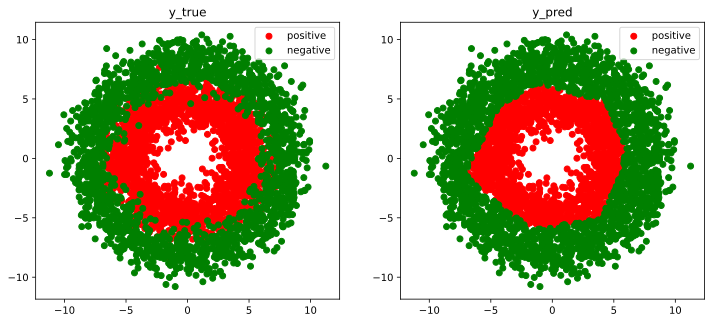

In [20]:
# ÁªìÊûúÂèØËßÜÂåñ
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize = (12,5))
ax1.scatter(Xp[:,0],Xp[:,1], c="r")
ax1.scatter(Xn[:,0],Xn[:,1],c = "g")
ax1.legend(["positive","negative"]);
ax1.set_title("y_true");

Xp_pred = X[torch.squeeze(net.forward(X)>=0.5)]
Xn_pred = X[torch.squeeze(net.forward(X)<0.5)]

ax2.scatter(Xp_pred[:,0],Xp_pred[:,1],c = "r")
ax2.scatter(Xn_pred[:,0],Xn_pred[:,1],c = "g")
ax2.legend(["positive","negative"]);
ax2.set_title("y_pred");


**4ÔºåËØÑ‰º∞Ê®°Âûã**

In [21]:
keras_model.evaluate(dl_val)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00, 10.53it/s, val_acc=0.927, val_loss=0.246]


{'val_loss': 0.24627135694026947, 'val_acc': 0.9266666769981384}

**5Ôºå‰ΩøÁî®Ê®°Âûã**

In [23]:
device = keras_model.accelerator.device 
@torch.no_grad()
def predict(net,dl):
    net.eval()
    result = torch.cat([net.forward(t[0].to(device)) for t in dl])
    return(result.data)

predictions = F.sigmoid(predict(net,dl_val)[:10]) 

In [24]:
predictions 

tensor([[0.8178],
        [0.1990],
        [0.1025],
        [0.9343],
        [0.7600],
        [0.7989],
        [0.9678],
        [0.0576],
        [0.0307],
        [0.0816]], device='mps:0')

**Â¶ÇÊûúÊú¨‰π¶ÂØπ‰Ω†ÊúâÊâÄÂ∏ÆÂä©ÔºåÊÉ≥ÈºìÂä±‰∏Ä‰∏ã‰ΩúËÄÖÔºåËÆ∞ÂæóÁªôÊú¨È°πÁõÆÂä†‰∏ÄÈ¢óÊòüÊòüstar‚≠êÔ∏èÔºåÂπ∂ÂàÜ‰∫´Áªô‰Ω†ÁöÑÊúãÂèã‰ª¨Âñîüòä!** 

Â¶ÇÊûúÂØπÊú¨‰π¶ÂÜÖÂÆπÁêÜËß£‰∏äÊúâÈúÄË¶ÅËøõ‰∏ÄÊ≠•Âíå‰ΩúËÄÖ‰∫§ÊµÅÁöÑÂú∞ÊñπÔºåÊ¨¢ËøéÂú®ÂÖ¨‰ºóÂè∑"ÁÆóÊ≥ïÁæéÈ£üÂ±ã"‰∏ãÁïôË®Ä„ÄÇ‰ΩúËÄÖÊó∂Èó¥ÂíåÁ≤æÂäõÊúâÈôêÔºå‰ºöÈÖåÊÉÖ‰∫à‰ª•ÂõûÂ§ç„ÄÇ

‰πüÂèØ‰ª•Âú®ÂÖ¨‰ºóÂè∑ÂêéÂè∞ÂõûÂ§çÂÖ≥ÈîÆÂ≠óÔºö**Âä†Áæ§**ÔºåÂä†ÂÖ•ËØªËÄÖ‰∫§ÊµÅÁæ§ÂíåÂ§ßÂÆ∂ËÆ®ËÆ∫„ÄÇ

![ÁÆóÊ≥ïÁæéÈ£üÂ±ãlogo.png](https://tva1.sinaimg.cn/large/e6c9d24egy1h41m2zugguj20k00b9q46.jpg)